# CMSC471 Artificial Intelligence

# Assignment-5: Classification and Regression with Neural Networks

*Zippy Cahn ID: ER57013* 

## Overview and Learning Objectives

You have learned the fundamentals of Neural Networks and Deep Learning. You have also learned how to train them based on the techniques discussed in lectures and the contents from Chapter 10 of the textbook (and you'll learn more on training deep neural networks in Chapter 11).

In Part I of this assignment, you are going to build a NN for classification. In Part II, you will build a NN for regression.

Pedagogically, this assignment will help you:
- better understand Neural Networks.

- practice with Tensorflow and Keras API.

- practice the skills you learned in sklearn and combine them with tf/keras to use in your project.

Notice that you should have Tensorflow version 2.0 installed and ready.

Alternatively, you may complete the assignment in [Colab](https://colab.research.google.com) but you need to run the following magic command in Colab to switch to version 2.0:

`%tensorflow_version 2.x`

<b>Important Notice:</b> Some outputs/plots are shared with you in this notebook for your reference. Some outputs are intentionally not shared. Notice that it is the strict course policy NOT to include any (or even parts) of the code solutions and/or answers to the questions in your posts in Piazza. 

In [1]:
# Import necessary Python/tf/keras modules
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.0.0
Eager Execution mode:  True


## Part I - Classification with NNs

First, [download the data](https://github.com/fereydoonvafaei/UMBC-CMSC-471-Fall-2019/blob/master/Assignment-5/diabetes.csv) `diabetes.csv` The target is to predict the onset of diabetes based on patient's features. You can read more about the data [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [3]:
# Load diabetes data with Pandas, it should be in the same working directory.
df = pd.read_csv("diabetes.csv")

print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <font color="red"> Required Coding

In [4]:
# Create X, y - Notice that X should contain all the features (columns) except 'Outcome'
# y should include only 'Outcome' because it's the label!
### START CODING HERE ###
X = set(df.columns) #-------------none replaced here
X = df.drop("Outcome", axis=1) 
y = df['Outcome'] #-------------none replaced here
### END CODING HERE ###

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [5]:
# Split the data to train and test with test_size=0.33 and random_state=66
### START CODING HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)  #-------------none replaced here
### END CODING HERE ###

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(514, 8)
(514,)
(254, 8)
(254,)


> There are different ways to load the data into tf tensors depeneding on your data type (image, text, etc). The following cell is one way of loading pandas dataframes to tensorflow tensors so that you can use tf/keras methods on them.

In [6]:
# Load train and test data to tf
train_tensor = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_tensor = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

In [7]:
type(train_tensor)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [8]:
for feat, targ in train_tensor.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [  3.   123.   100.    35.   240.    57.3    0.88  22.  ], Target: 0
Features: [  0.    104.     64.     23.    116.     27.8     0.454  23.   ], Target: 0
Features: [10.    75.    82.     0.     0.    33.3    0.263 38.   ], Target: 0
Features: [  4.    183.      0.      0.      0.     28.4     0.212  36.   ], Target: 1
Features: [  2.     98.     60.     17.    120.     34.7     0.198  22.   ], Target: 0


> As discussed in the lectures, data is fed into the network in batches (mini-batches).

In [9]:
# Batch train and test data
train_batch = train_tensor.shuffle(len(X_train)).batch(1)
test_batch = test_tensor.shuffle(len(X_test)).batch(1)

print(type(train_batch))
print(type(test_batch))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


>Now, build the model based on the given architecture specifications.

## <font color="red"> Required Coding

In [10]:
### START CODING HERE ###
# Build a Sequential neural network - a classifier model
nn_clf = tf.keras.Sequential([
    # Create a dense layer with 12 units, input_dim=8, and 'relu' activation function ~ 1 line
    tf.keras.layers.Dense(12, input_dim=8, activation='relu'), #--------------------------------------None replaced here
    # Create a dense layer with 8 units, and 'relu' activation function ~ 1 line
    tf.keras.layers.Dense(8, activation='relu'), #--------------------------------------None replaced here
    # Create a dense layer with ? unit(s), and '?' activation function ~ 1 line
    # YOU should decide on the number of untis and the activation function for this last layer (output layer)
    # Hint: What type of ML task is this problem?
    tf.keras.layers.Dense(1, activation='sigmoid') #--------------------------------------None replaced here
    ])  
### END CODING HERE ###

In [11]:
### START CODING HERE ###
# Compile the model by 'adam' optimizer, 'binary_crossentropy' loss and 'accuracy' as metrics ~ 1 line
nn_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #----------------------none replaced here
### END CODING HERE ###

In [12]:
### START CODING HERE ###
# Fit nn_clf model on train_batch with 150 epochs
nn_clf_history = nn_clf.fit(train_batch, epochs=150)#------------None replaced here
### END CODING HERE ###

Epoch 1/150
514/514 [==============================] - 4s 9ms/step - loss: 1.9456 - accuracy: 0.6012
Epoch 2/150
514/514 [==============================] - 2s 4ms/step - loss: 1.1694 - accuracy: 0.6265
Epoch 3/150
514/514 [==============================] - 3s 5ms/step - loss: 0.9618 - accuracy: 0.6634
Epoch 4/150
514/514 [==============================] - 2s 4ms/step - loss: 0.8756 - accuracy: 0.6381
Epoch 5/150
514/514 [==============================] - 2s 3ms/step - loss: 0.8829 - accuracy: 0.6712
Epoch 6/150
514/514 [==============================] - 2s 3ms/step - loss: 0.8364 - accuracy: 0.6809
Epoch 7/150
514/514 [==============================] - 1s 3ms/step - loss: 0.7489 - accuracy: 0.6809
Epoch 8/150
514/514 [==============================] - 2s 4ms/step - loss: 0.7276 - accuracy: 0.6868
Epoch 9/150
514/514 [==============================] - 1s 3ms/step - loss: 0.7923 - accuracy: 0.6790
Epoch 10/150
514/514 [==============================] - 1s 3ms/step - loss: 0.7404 - accura

> `history` now contains values for `loss` and `accuracy` during training, let's plot them.

(0, 1)

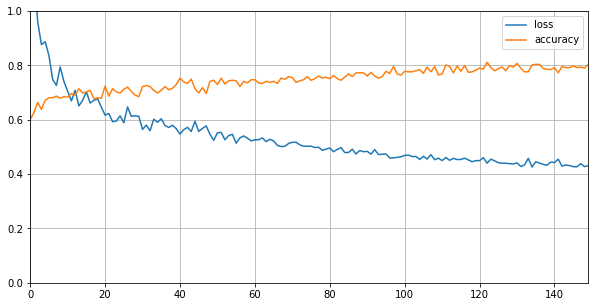

In [13]:
pd.DataFrame(nn_clf_history.history).plot(figsize=(10, 5))
plt.grid(True)

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

## <font color="red"> Required Coding

In [14]:
### START CODING HERE ###
# evaluate nn_clf model on test_batch using .evaluate method
nn_clf.evaluate(test_batch)#---------------None replaced here
### END CODING HERE ###

254/254 [==============================] - 1s 3ms/step - loss: 0.6324 - accuracy: 0.7441


[0.6323786165927098, 0.7440945]

In [15]:
nn_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


> Now, let's plot ROC curve for this neural network model. Recall from Assignment-4 that you need to get class probabilities, fpr and tpr. To get class probabilities, keras has `predict()` method. Notice that it's applied on `X_test` not `test_batch`. Alternatively, you can use `predict_proba()` method, similar to sklearn, which would generate identical results.

In [16]:
# Get class probabilities for nn - ignore the warning
nn_preds = nn_clf.predict(X_test).ravel()

In [17]:
# See class probabilities predicted by nn classifier
nn_preds[:5]

array([0.0493176 , 0.05083212, 0.04634118, 0.1103442 , 0.        ],
      dtype=float32)

## <font color="red"> Required Coding

Text(0.5, 0, 'False Positive Rate')

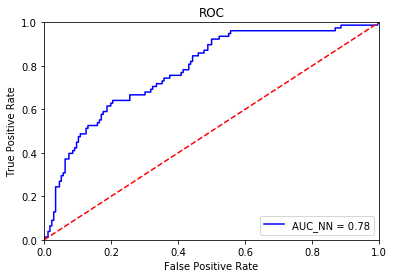

In [18]:
### START CODING HERE ### 
# Plot ROC curve for nn_clf - Write as many lines of code as needed
# Hint: check back your Assignment-4 code, you need to calculate tpr, fpr, thresholds
# Plot should have all the elements that Assignment-4 ROC curves had, title, xlabel and ylabel, xlim & ylim
# Plot should also have AUC_NN (roc_auc) shown on lower right


# Get class probabilities, fpr, tpr and threshold for nn.
nn_probs = nn_clf.predict_proba(X_test)
#nn_preds = nn_probs[:,1]
nn_fpr, nn_tpr, nn_threshold = metrics.roc_curve(y_test, nn_preds)
nn_roc_auc = metrics.auc(nn_fpr, nn_tpr)


# Plot ROC curve.
plt.title('ROC')
plt.plot(nn_fpr, nn_tpr, 'b', label = 'AUC_NN = %0.2f' % nn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


### END CODING HERE ###

## Part I - Questions

<b>ANSWER THE FOLLOWING QUESTIONS HERE:</b><br>

Q1 - If this problem was a multi-class classification, what activation function would you use for the output layer neurons? How many neurons would be required for the output layer for multi-class? What other hyperparameters of nn can you change in different tasks? Name at least 3 other hyperparameters. GIVE COMPLETE ANSWER!

If it were a multi-class classification the activation function would be softmax. The neurons required would be would be the same as the amount of classes. Three hyperparameters that could be changed are the input dimensions, activation function, learning batch, and number of hidden layers. 

Q2 - Change the batch number from 1 to 10. Would it improve or hurt the results? Make an argument with reasoning on your observation (you may consult with page 326 of the textbook).

It decreased the accuracy. More mini batches increases time.  Usually smaller batch sizes are favored.  they also do not usually exceed 30.  (see page 346)

## Part II - Regression with NNs

In this part, you will create a neural network to do a regression task.

[Download the data from here](https://github.com/fereydoonvafaei/UMBC-CMSC-471-Fall-2019/blob/master/Assignment-5/auto.csv). This is cars dataset. You can read more about the data [here](https://archive.ics.uci.edu/ml/datasets/auto+mpg). The goal is predicting MPG based on other features.

In [19]:
auto_data = pd.read_csv('auto.csv')
print(auto_data.shape)
auto_data.head()

(398, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [20]:
auto_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

## <font color="red"> Required Coding

In [21]:
### START CODING HERE ### 
# Drop all na's using dataframe .dropna(inplace=True) method ~ 1 line
auto_data.dropna(inplace=True)#----------None replaced here
### END CODING HERE ###
auto_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

>For some datasets like this, a technique in data preprocessing is used to encode categorical features to dummy variables. Here, we convert <b>Origin</b> (which looks numeric but is actually categorical) using pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method. This technique is one example of One Hot Encoding of categorical features.

In [22]:
auto_data['Origin'] = auto_data['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))
auto_data = pd.get_dummies(auto_data, prefix='', prefix_sep='')
print(auto_data.shape)
auto_data.head()

(392, 10)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## <font color="red"> Required Coding

In [23]:
### START CODING HERE ### 
# Create X and y, X should contain all features except MPG column and y should only contain MPG column
# Hint: You can use dataframe .pop() method, but you may need to create a deep copy of the dataframe first
# There are usually multiple ways of doing these operations in pnadas dataframes
X = set(auto_data.columns) #-------------none replaced here
X = auto_data.drop("MPG", axis=1) 
y = auto_data['MPG'] #-------------none replaced here
### END CODING HERE ###
print(X.shape)
print(y.shape)
X.head()

(392, 9)
(392,)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,8,302.0,140.0,3449.0,10.5,70,0,0,1


> <b>Note:</b> The original auto_data dataframe should remain the same and should still include MPG.

In [24]:
auto_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


>Normalization is a good pratice when you work with values with different ranges.

In [25]:
# Normalize X 
X = (X - X.mean())/X.std()
print(X.shape)
X.head()

(392, 9)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.457538,-0.501749,0.773608
1,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.457538,-0.501749,0.773608
2,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.457538,-0.501749,0.773608
3,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.457538,-0.501749,0.773608
4,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.457538,-0.501749,0.773608


## <font color="red"> Required Coding

In [26]:
### START CODING HERE ###
# Split the data to train and test using train_test_split method with test_size=0.2 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #-------------none replaced here
### END CODING HERE ###

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(313, 9)
(313,)
(79, 9)
(79,)


In [27]:
### START CODING HERE ### 
# Build a neural network for regression
nn_reg1 = tf.keras.Sequential([
    # Create a dense layer with 64 neurons, 'relu' activation function and input_shape=[len(X_train.keys())]
    tf.keras.layers.Dense(64, activation='relu',input_shape=[len(X_train.keys())]), #--------------------------------------None replaced here,
    # Create a dense layer with 64 neurons and 'relu' activation function
    tf.keras.layers.Dense(64, activation='relu'), #--------------------------------------None replaced here,
    # Create a dense layer with ? neuron(s) and ? activation
    # YOU should decide how many neuron(s) is/are needed and what activation function (if any) to use for output
    # Hint: What type of ML task is this problem?
    tf.keras.layers.Dense(1) #--------------------------------------None replaced here
    ])
### END CODING HERE ###

In [28]:
# This is another way of defining the optimizer, you can pass learning_rate and other parameters to it.
optimizer = tf.keras.optimizers.RMSprop(0.001)

### START CODING HERE ### 
# Compile nn_reg1 with 'mse' loss, optimizer=optimizer, metrics=['mae', 'mse']
nn_reg1.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse']) #----------------------none replaced here
### END CODING HERE ###

In [29]:
nn_reg1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## <font color="red"> Required Coding

In [30]:
EPOCHS = 1000

### START CODING HERE ### 
# fit nn_reg1 on X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=1
nn_reg1_history = nn_reg1.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=1)#------------None replaced here
### END CODING HERE ###
### END CODING HERE ###

Train on 250 samples, validate on 63 samples
Epoch 1/1000
250/250 [==============================] - 1s 3ms/sample - loss: 581.3238 - mae: 22.7638 - mse: 581.3237 - val_loss: 629.4623 - val_mae: 23.8688 - val_mse: 629.4623
Epoch 2/1000
250/250 [==============================] - 0s 157us/sample - loss: 529.3934 - mae: 21.6357 - mse: 529.3934 - val_loss: 576.0265 - val_mae: 22.7724 - val_mse: 576.0266
Epoch 3/1000
250/250 [==============================] - 0s 142us/sample - loss: 477.7653 - mae: 20.4729 - mse: 477.7653 - val_loss: 515.6352 - val_mae: 21.4831 - val_mse: 515.6352
Epoch 4/1000
250/250 [==============================] - 0s 153us/sample - loss: 419.6160 - mae: 19.1126 - mse: 419.6160 - val_loss: 447.3685 - val_mae: 19.9405 - val_mse: 447.3685
Epoch 5/1000
250/250 [==============================] - 0s 150us/sample - loss: 355.7992 - mae: 17.5138 - mse: 355.7992 - val_loss: 373.5874 - val_mae: 18.1350 - val_mse: 373.5874
Epoch 6/1000
250/250 [==============================] - 0

Epoch 47/1000
250/250 [==============================] - 0s 103us/sample - loss: 7.9478 - mae: 2.0173 - mse: 7.9478 - val_loss: 6.8490 - val_mae: 1.8327 - val_mse: 6.8490
Epoch 48/1000
250/250 [==============================] - 0s 103us/sample - loss: 7.7932 - mae: 1.9830 - mse: 7.7932 - val_loss: 6.7596 - val_mae: 1.8288 - val_mse: 6.7596
Epoch 49/1000
250/250 [==============================] - 0s 114us/sample - loss: 7.8966 - mae: 2.0034 - mse: 7.8966 - val_loss: 7.0985 - val_mae: 1.8939 - val_mse: 7.0985
Epoch 50/1000
250/250 [==============================] - 0s 103us/sample - loss: 7.8011 - mae: 2.0113 - mse: 7.8011 - val_loss: 7.4159 - val_mae: 1.9627 - val_mse: 7.4159
Epoch 51/1000
250/250 [==============================] - 0s 113us/sample - loss: 7.5213 - mae: 1.9578 - mse: 7.5213 - val_loss: 7.3463 - val_mae: 1.9571 - val_mse: 7.3463
Epoch 52/1000
250/250 [==============================] - 0s 116us/sample - loss: 7.5879 - mae: 1.9689 - mse: 7.5879 - val_loss: 6.5623 - val_mae:

250/250 [==============================] - 0s 103us/sample - loss: 6.0361 - mae: 1.7699 - mse: 6.0361 - val_loss: 5.7154 - val_mae: 1.7598 - val_mse: 5.7154
Epoch 142/1000
250/250 [==============================] - 0s 120us/sample - loss: 6.0598 - mae: 1.7629 - mse: 6.0598 - val_loss: 6.5131 - val_mae: 1.8750 - val_mse: 6.5131
Epoch 143/1000
250/250 [==============================] - 0s 133us/sample - loss: 6.0991 - mae: 1.7799 - mse: 6.0991 - val_loss: 6.9811 - val_mae: 1.9661 - val_mse: 6.9811
Epoch 144/1000
250/250 [==============================] - 0s 111us/sample - loss: 6.2971 - mae: 1.7587 - mse: 6.2971 - val_loss: 5.7985 - val_mae: 1.7792 - val_mse: 5.7985
Epoch 145/1000
250/250 [==============================] - 0s 109us/sample - loss: 6.2193 - mae: 1.7871 - mse: 6.2193 - val_loss: 6.7222 - val_mae: 1.9230 - val_mse: 6.7222
Epoch 146/1000
250/250 [==============================] - 0s 113us/sample - loss: 6.0687 - mae: 1.7439 - mse: 6.0687 - val_loss: 6.6230 - val_mae: 1.8971 -

Epoch 189/1000
250/250 [==============================] - 0s 122us/sample - loss: 5.7538 - mae: 1.7128 - mse: 5.7538 - val_loss: 5.5052 - val_mae: 1.7114 - val_mse: 5.5052
Epoch 190/1000
250/250 [==============================] - 0s 119us/sample - loss: 5.8570 - mae: 1.7192 - mse: 5.8570 - val_loss: 5.5883 - val_mae: 1.7314 - val_mse: 5.5883
Epoch 191/1000
250/250 [==============================] - 0s 117us/sample - loss: 6.0536 - mae: 1.7393 - mse: 6.0536 - val_loss: 5.5614 - val_mae: 1.7276 - val_mse: 5.5614
Epoch 192/1000
250/250 [==============================] - 0s 116us/sample - loss: 5.7094 - mae: 1.7038 - mse: 5.7094 - val_loss: 6.9111 - val_mae: 1.9232 - val_mse: 6.9111
Epoch 193/1000
250/250 [==============================] - 0s 113us/sample - loss: 6.0033 - mae: 1.7463 - mse: 6.0033 - val_loss: 5.4532 - val_mae: 1.7103 - val_mse: 5.4532
Epoch 194/1000
250/250 [==============================] - 0s 174us/sample - loss: 5.8237 - mae: 1.7300 - mse: 5.8237 - val_loss: 5.7465 - va

Epoch 284/1000
250/250 [==============================] - 0s 109us/sample - loss: 5.2402 - mae: 1.6205 - mse: 5.2402 - val_loss: 5.6196 - val_mae: 1.7167 - val_mse: 5.6196
Epoch 285/1000
250/250 [==============================] - 0s 111us/sample - loss: 5.3465 - mae: 1.6314 - mse: 5.3465 - val_loss: 5.5906 - val_mae: 1.7135 - val_mse: 5.5906
Epoch 286/1000
250/250 [==============================] - 0s 102us/sample - loss: 5.3830 - mae: 1.6681 - mse: 5.3830 - val_loss: 5.9915 - val_mae: 1.7539 - val_mse: 5.9915
Epoch 287/1000
250/250 [==============================] - 0s 110us/sample - loss: 5.3204 - mae: 1.6195 - mse: 5.3204 - val_loss: 5.4008 - val_mae: 1.6992 - val_mse: 5.4008
Epoch 288/1000
250/250 [==============================] - 0s 137us/sample - loss: 5.1703 - mae: 1.6095 - mse: 5.1703 - val_loss: 5.3223 - val_mae: 1.6476 - val_mse: 5.3223
Epoch 289/1000
250/250 [==============================] - 0s 105us/sample - loss: 5.4959 - mae: 1.6691 - mse: 5.4959 - val_loss: 5.5580 - va

Epoch 332/1000
250/250 [==============================] - 0s 97us/sample - loss: 5.3490 - mae: 1.6036 - mse: 5.3490 - val_loss: 5.4523 - val_mae: 1.6779 - val_mse: 5.4523
Epoch 333/1000
250/250 [==============================] - 0s 103us/sample - loss: 5.1294 - mae: 1.5999 - mse: 5.1294 - val_loss: 5.2984 - val_mae: 1.6591 - val_mse: 5.2984
Epoch 334/1000
250/250 [==============================] - 0s 105us/sample - loss: 4.9997 - mae: 1.5838 - mse: 4.9997 - val_loss: 6.1208 - val_mae: 1.7317 - val_mse: 6.1208
Epoch 335/1000
250/250 [==============================] - 0s 114us/sample - loss: 5.2056 - mae: 1.6020 - mse: 5.2056 - val_loss: 5.3989 - val_mae: 1.6531 - val_mse: 5.3989
Epoch 336/1000
250/250 [==============================] - 0s 112us/sample - loss: 5.0711 - mae: 1.5949 - mse: 5.0711 - val_loss: 5.7211 - val_mae: 1.6849 - val_mse: 5.7211
Epoch 337/1000
250/250 [==============================] - 0s 120us/sample - loss: 5.0554 - mae: 1.5859 - mse: 5.0554 - val_loss: 5.5409 - val

Epoch 380/1000
250/250 [==============================] - 0s 113us/sample - loss: 4.9396 - mae: 1.5609 - mse: 4.9396 - val_loss: 5.7386 - val_mae: 1.6896 - val_mse: 5.7386
Epoch 381/1000
250/250 [==============================] - 0s 108us/sample - loss: 4.9782 - mae: 1.5646 - mse: 4.9782 - val_loss: 6.3331 - val_mae: 1.7509 - val_mse: 6.3331
Epoch 382/1000
250/250 [==============================] - 0s 118us/sample - loss: 4.7218 - mae: 1.5245 - mse: 4.7218 - val_loss: 5.8418 - val_mae: 1.7085 - val_mse: 5.8418
Epoch 383/1000
250/250 [==============================] - 0s 103us/sample - loss: 4.9297 - mae: 1.5561 - mse: 4.9297 - val_loss: 5.8394 - val_mae: 1.6875 - val_mse: 5.8394
Epoch 384/1000
250/250 [==============================] - 0s 112us/sample - loss: 5.0233 - mae: 1.5668 - mse: 5.0233 - val_loss: 5.7052 - val_mae: 1.6739 - val_mse: 5.7052
Epoch 385/1000
250/250 [==============================] - 0s 104us/sample - loss: 4.9172 - mae: 1.5401 - mse: 4.9172 - val_loss: 5.4520 - va

Epoch 428/1000
250/250 [==============================] - 0s 112us/sample - loss: 4.6901 - mae: 1.5321 - mse: 4.6901 - val_loss: 5.5177 - val_mae: 1.7352 - val_mse: 5.5177
Epoch 429/1000
250/250 [==============================] - 0s 118us/sample - loss: 5.0571 - mae: 1.5643 - mse: 5.0571 - val_loss: 5.8446 - val_mae: 1.6918 - val_mse: 5.8446
Epoch 430/1000
250/250 [==============================] - 0s 122us/sample - loss: 4.5050 - mae: 1.4992 - mse: 4.5050 - val_loss: 8.1807 - val_mae: 2.0697 - val_mse: 8.1807
Epoch 431/1000
250/250 [==============================] - 0s 120us/sample - loss: 5.0175 - mae: 1.5374 - mse: 5.0175 - val_loss: 5.7898 - val_mae: 1.7166 - val_mse: 5.7898
Epoch 432/1000
250/250 [==============================] - 0s 142us/sample - loss: 4.6296 - mae: 1.5004 - mse: 4.6296 - val_loss: 5.9364 - val_mae: 1.7041 - val_mse: 5.9364
Epoch 433/1000
250/250 [==============================] - 0s 142us/sample - loss: 4.7331 - mae: 1.5253 - mse: 4.7331 - val_loss: 5.5145 - va

Epoch 476/1000
250/250 [==============================] - 0s 117us/sample - loss: 4.5072 - mae: 1.4813 - mse: 4.5072 - val_loss: 5.9992 - val_mae: 1.7039 - val_mse: 5.9992
Epoch 477/1000
250/250 [==============================] - 0s 124us/sample - loss: 4.5271 - mae: 1.4530 - mse: 4.5271 - val_loss: 6.0156 - val_mae: 1.7210 - val_mse: 6.0156
Epoch 478/1000
250/250 [==============================] - 0s 116us/sample - loss: 4.5846 - mae: 1.4903 - mse: 4.5846 - val_loss: 5.6463 - val_mae: 1.7069 - val_mse: 5.6463
Epoch 479/1000
250/250 [==============================] - 0s 115us/sample - loss: 4.4982 - mae: 1.4865 - mse: 4.4982 - val_loss: 6.6968 - val_mae: 1.8201 - val_mse: 6.6968
Epoch 480/1000
250/250 [==============================] - 0s 109us/sample - loss: 4.5440 - mae: 1.4801 - mse: 4.5440 - val_loss: 6.4555 - val_mae: 1.7543 - val_mse: 6.4555
Epoch 481/1000
250/250 [==============================] - 0s 112us/sample - loss: 4.4502 - mae: 1.4579 - mse: 4.4502 - val_loss: 6.5498 - va

Epoch 524/1000
250/250 [==============================] - 0s 105us/sample - loss: 4.5350 - mae: 1.4763 - mse: 4.5350 - val_loss: 6.2427 - val_mae: 1.7482 - val_mse: 6.2427
Epoch 525/1000
250/250 [==============================] - 0s 124us/sample - loss: 4.2017 - mae: 1.4214 - mse: 4.2017 - val_loss: 5.8229 - val_mae: 1.7032 - val_mse: 5.8229
Epoch 526/1000
250/250 [==============================] - 0s 116us/sample - loss: 4.3576 - mae: 1.4451 - mse: 4.3576 - val_loss: 6.5239 - val_mae: 1.7467 - val_mse: 6.5239
Epoch 527/1000
250/250 [==============================] - 0s 127us/sample - loss: 4.1174 - mae: 1.4309 - mse: 4.1174 - val_loss: 6.0146 - val_mae: 1.7230 - val_mse: 6.0146
Epoch 528/1000
250/250 [==============================] - 0s 114us/sample - loss: 4.3935 - mae: 1.4392 - mse: 4.3935 - val_loss: 5.8943 - val_mae: 1.7624 - val_mse: 5.8943
Epoch 529/1000
250/250 [==============================] - 0s 116us/sample - loss: 4.2962 - mae: 1.4228 - mse: 4.2962 - val_loss: 6.0020 - va

Epoch 619/1000
250/250 [==============================] - 0s 100us/sample - loss: 3.8377 - mae: 1.3456 - mse: 3.8377 - val_loss: 8.2922 - val_mae: 1.9804 - val_mse: 8.2922
Epoch 620/1000
250/250 [==============================] - 0s 108us/sample - loss: 4.0955 - mae: 1.3708 - mse: 4.0955 - val_loss: 6.6018 - val_mae: 1.7862 - val_mse: 6.6018
Epoch 621/1000
250/250 [==============================] - 0s 123us/sample - loss: 3.8716 - mae: 1.3411 - mse: 3.8716 - val_loss: 7.5056 - val_mae: 1.8689 - val_mse: 7.5056
Epoch 622/1000
250/250 [==============================] - 0s 111us/sample - loss: 3.8290 - mae: 1.3401 - mse: 3.8290 - val_loss: 7.6230 - val_mae: 1.8792 - val_mse: 7.6230
Epoch 623/1000
250/250 [==============================] - 0s 116us/sample - loss: 4.0764 - mae: 1.3687 - mse: 4.0764 - val_loss: 6.1152 - val_mae: 1.7155 - val_mse: 6.1152
Epoch 624/1000
250/250 [==============================] - 0s 121us/sample - loss: 3.8501 - mae: 1.3498 - mse: 3.8501 - val_loss: 6.0755 - va

Epoch 714/1000
250/250 [==============================] - 0s 107us/sample - loss: 3.4402 - mae: 1.2399 - mse: 3.4402 - val_loss: 6.9252 - val_mae: 1.7964 - val_mse: 6.9252
Epoch 715/1000
250/250 [==============================] - 0s 118us/sample - loss: 3.5043 - mae: 1.2747 - mse: 3.5043 - val_loss: 7.4705 - val_mae: 1.8246 - val_mse: 7.4705
Epoch 716/1000
250/250 [==============================] - 0s 125us/sample - loss: 3.5689 - mae: 1.2991 - mse: 3.5689 - val_loss: 8.0727 - val_mae: 1.9290 - val_mse: 8.0727
Epoch 717/1000
250/250 [==============================] - 0s 119us/sample - loss: 3.5061 - mae: 1.2406 - mse: 3.5061 - val_loss: 6.5422 - val_mae: 1.7627 - val_mse: 6.5422
Epoch 718/1000
250/250 [==============================] - 0s 115us/sample - loss: 3.5063 - mae: 1.2240 - mse: 3.5063 - val_loss: 7.0203 - val_mae: 1.8328 - val_mse: 7.0203
Epoch 719/1000
250/250 [==============================] - 0s 114us/sample - loss: 3.6019 - mae: 1.2653 - mse: 3.6019 - val_loss: 6.8661 - va

Epoch 762/1000
250/250 [==============================] - 0s 95us/sample - loss: 3.4699 - mae: 1.2190 - mse: 3.4699 - val_loss: 6.9616 - val_mae: 1.8279 - val_mse: 6.9616
Epoch 763/1000
250/250 [==============================] - 0s 105us/sample - loss: 3.5768 - mae: 1.2631 - mse: 3.5768 - val_loss: 7.4560 - val_mae: 1.8012 - val_mse: 7.4560
Epoch 764/1000
250/250 [==============================] - 0s 108us/sample - loss: 3.2871 - mae: 1.2221 - mse: 3.2871 - val_loss: 7.1329 - val_mae: 1.8162 - val_mse: 7.1329
Epoch 765/1000
250/250 [==============================] - 0s 110us/sample - loss: 3.1572 - mae: 1.1903 - mse: 3.1572 - val_loss: 7.6406 - val_mae: 1.8359 - val_mse: 7.6406
Epoch 766/1000
250/250 [==============================] - 0s 109us/sample - loss: 3.3671 - mae: 1.2387 - mse: 3.3671 - val_loss: 8.3037 - val_mae: 1.9731 - val_mse: 8.3037
Epoch 767/1000
250/250 [==============================] - 0s 111us/sample - loss: 3.3884 - mae: 1.2755 - mse: 3.3884 - val_loss: 7.7582 - val

Epoch 810/1000
250/250 [==============================] - 0s 107us/sample - loss: 3.2092 - mae: 1.2070 - mse: 3.2092 - val_loss: 7.3047 - val_mae: 1.8556 - val_mse: 7.3047
Epoch 811/1000
250/250 [==============================] - 0s 103us/sample - loss: 3.2842 - mae: 1.2179 - mse: 3.2842 - val_loss: 7.1341 - val_mae: 1.8136 - val_mse: 7.1341
Epoch 812/1000
250/250 [==============================] - 0s 109us/sample - loss: 3.3693 - mae: 1.2353 - mse: 3.3693 - val_loss: 8.4308 - val_mae: 1.9415 - val_mse: 8.4308
Epoch 813/1000
250/250 [==============================] - 0s 110us/sample - loss: 3.1803 - mae: 1.2097 - mse: 3.1803 - val_loss: 7.4948 - val_mae: 1.8526 - val_mse: 7.4948
Epoch 814/1000
250/250 [==============================] - 0s 108us/sample - loss: 3.1169 - mae: 1.1951 - mse: 3.1169 - val_loss: 7.7732 - val_mae: 1.8906 - val_mse: 7.7732
Epoch 815/1000
250/250 [==============================] - 0s 104us/sample - loss: 3.1537 - mae: 1.1944 - mse: 3.1537 - val_loss: 8.4198 - va

Epoch 905/1000
250/250 [==============================] - 0s 105us/sample - loss: 2.8907 - mae: 1.1626 - mse: 2.8907 - val_loss: 8.1325 - val_mae: 1.9297 - val_mse: 8.1325
Epoch 906/1000
250/250 [==============================] - 0s 97us/sample - loss: 2.9893 - mae: 1.1490 - mse: 2.9893 - val_loss: 7.3998 - val_mae: 1.9045 - val_mse: 7.3998
Epoch 907/1000
250/250 [==============================] - 0s 112us/sample - loss: 2.9852 - mae: 1.1743 - mse: 2.9852 - val_loss: 7.5322 - val_mae: 1.8761 - val_mse: 7.5322
Epoch 908/1000
250/250 [==============================] - 0s 114us/sample - loss: 2.9493 - mae: 1.1325 - mse: 2.9493 - val_loss: 8.1987 - val_mae: 1.9413 - val_mse: 8.1987
Epoch 909/1000
250/250 [==============================] - 0s 108us/sample - loss: 3.0036 - mae: 1.1285 - mse: 3.0036 - val_loss: 7.3049 - val_mae: 1.8772 - val_mse: 7.3049
Epoch 910/1000
250/250 [==============================] - 0s 111us/sample - loss: 3.0680 - mae: 1.1630 - mse: 3.0680 - val_loss: 7.5527 - val

Epoch 953/1000
250/250 [==============================] - 0s 117us/sample - loss: 2.9425 - mae: 1.1355 - mse: 2.9425 - val_loss: 7.5379 - val_mae: 1.9002 - val_mse: 7.5379
Epoch 954/1000
250/250 [==============================] - 0s 127us/sample - loss: 2.8255 - mae: 1.0971 - mse: 2.8255 - val_loss: 7.8591 - val_mae: 1.9767 - val_mse: 7.8591
Epoch 955/1000
250/250 [==============================] - 0s 124us/sample - loss: 2.8706 - mae: 1.1166 - mse: 2.8706 - val_loss: 8.7351 - val_mae: 1.9936 - val_mse: 8.7351
Epoch 956/1000
250/250 [==============================] - 0s 127us/sample - loss: 2.7926 - mae: 1.1261 - mse: 2.7926 - val_loss: 7.8515 - val_mae: 2.0341 - val_mse: 7.8515
Epoch 957/1000
250/250 [==============================] - 0s 130us/sample - loss: 2.9726 - mae: 1.1253 - mse: 2.9726 - val_loss: 8.2676 - val_mae: 1.9271 - val_mse: 8.2676
Epoch 958/1000
250/250 [==============================] - 0s 129us/sample - loss: 2.7009 - mae: 1.0893 - mse: 2.7009 - val_loss: 8.1025 - va

In [31]:
### START CODING HERE ### 
# Evaluate nn_reg1 using .evaluate() method on X_test, y_test and verbose=2
loss1, mae1, mse1 = nn_reg1.evaluate(X_test, y_test, verbose=2) #-----------none replaced here
### END CODING HERE ###

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae1))

79/79 - 0s - loss: 9.4237 - mae: 2.2331 - mse: 9.4237
Testing set Mean Abs Error:  2.23 MPG


In [32]:
# Your numbers might be a little different due to the randomness!
hist1 = pd.DataFrame(nn_reg1_history.history)
hist1['epoch'] = nn_reg1_history.epoch
hist1.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.861142,1.110652,2.861142,8.376190,1.938384,8.376189,995
996,2.846272,1.111632,2.846272,9.192054,2.098942,9.192055,996
997,2.701219,1.070615,2.701219,8.574784,2.013869,8.574784,997
998,2.674841,1.078005,2.674842,8.537490,2.003216,8.537489,998
999,2.694892,1.064860,2.694892,7.831273,1.927910,7.831273,999


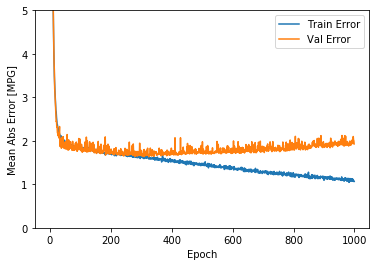

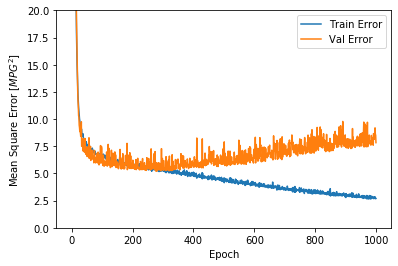

In [33]:
# Your plots might be slightly different, i.e. they should look very similar to the plots below!
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(nn_reg1_history)

> Based on the above plots, it looks like that there is not too much improvement after around 100 epochs. Later when we study Chapter 11, you will learn that there is a technique called `EarlyStopping` that can be used here which stops training if there is not much improvement after a fixed number of epochs. Moreover for now, you should fine-tune the hyperparameters of the network to see if you can see any improvements. Report the results of your hyperparameter tuning in the following cell. This is what's called <b>Grid Search</b> in hyperparameter tuning.

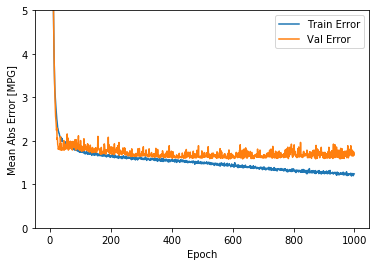

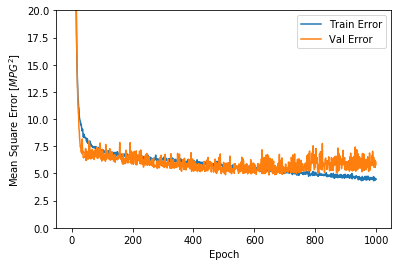

In [43]:
### START CODING HERE ### 
# Build another regression neural network with the same architecture,
# but you later compile it with different hyperparameters
nn_reg2 = tf.keras.Sequential([
    # Create a dense layer with 64 neurons, 'relu' activation function and input_shape=[len(X_train.keys())]
    tf.keras.layers.Dense(64, activation='relu',input_shape=[len(X_train.keys())]), #--------------------------------------None replaced here,
    # Create a dense layer with 64 neurons and 'relu' activation function
    tf.keras.layers.Dense(64, activation='relu'), #--------------------------------------None replaced here,
    # Create a dense layer with ? neuron(s) and ? activation
    # YOU should decide how many neuron(s) is/are needed and what activation function (if any) to use for output
    # Hint: What type of ML task is this problem?
    tf.keras.layers.Dense(1) #--------------------------------------None replaced here
    ])

# Fine-tune the optimizer as follows:
# First, try a different optimizer - SGD with the learning_rate = 0.001
# Then, switch optimizer to Adam,
# and use three different values of learning_rate in the order of 10 or 10^(-1) like 0.01, 0.1 and 1.
# You may try other values for learning_rate.
# Report the results of your hyperparameter tuning in the following cell.
optimizer = tf.keras.optimizers.RMSprop(0.001) #---------------------none replaced here

# Compile nn_reg2 with loss='mae', optimizer=optimizer and metrics=['mae', 'mse']
nn_reg2.compile(optimizer=optimizer, loss='mae', metrics=['mae', 'mse']) #----------------------none replaced here


# Fit nn_reg2 on X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=0
nn_reg2_history = nn_reg2.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=0)#------------None replaced here
### END CODING HERE ###

plot_history(nn_reg2_history)

In [44]:
### START CODING HERE ### 
# Evaluate nn_reg2 using .evaluate() method on X_test, y_test and verbose=2
loss2, mae2, mse2 = nn_reg2.evaluate(X_test, y_test, verbose=2) #-----------none replaced here
### END CODING HERE ###

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae2))

79/79 - 0s - loss: 1.7745 - mae: 1.7745 - mse: 6.0693
Testing set Mean Abs Error:  1.77 MPG


Report the results of your hyperparameter tuning HERE:

SGD - Testing Set mae: 1.75 MPG learning rate = 0.001
<br>
Adam learning_rate1 - Testing Set mae: 2.31 MPG learning rate = 0.01
<br>
Adam learning_rate2 - Testing Set mae: 2.66 MPG learning rate = 0.1
<br>
Adam learning_rate3 - Testing Set mae: 5.80 MPG learning rate = 1

> You can check the quality of the model predictions by the following plot. Use this plot to answer Part II Q1.

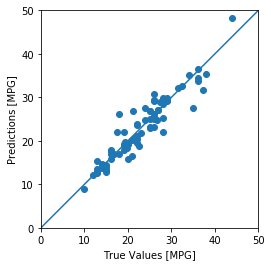

In [36]:
# Use the best hyperparameters you found for compiling nn_reg2, then run this cell
nn_reg2_preds = nn_reg2.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, nn_reg2_preds)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Part II - Questions

<b>ANSWER THE FOLLOWING QUESTIONS HERE:</b>

Q1- How do you interprete the plot above in terms of the model performance (Predictions vs True Values)? GIVE COMPLETE ANSWER!

Based on the plot above, the performance vs true values appear to be pretty accurate and error is small.  

Q2 - How do you interprete the first regression model's plots of mse and mae, i.e. `plot_history(nn_reg1_history)`? What is the impact of choosing `mse` vs `mae`? Why the axis scales are different for `mse` and `mae`? GIVE COMPLETE ANSWER!

The mse has a higher val error than mae.  The reason is because the way the two are calculated where mse is squared and requires a larger scale.  Squaring makes large numbers larger and small numbers smaller.  The impact of choosing one over the other is that the error is large regardless of the number of epochs.

Q3 - What is the role of `validation_split` hyperparameter in `fit` method? What does it change exactly and why is it used? GIVE COMPLETE ANSWER!

Splits the training data into a validation dataset and evaluate the performance of the model on that validation dataset at each epoch. This is done by setting the validation_split argument on the fit function to a percentage of the size of the training dataset.  It changes the validation set that was split off of the training data.

## Optional Part III - <font color=green>Extra Credit</font>

<b>Notice:</b> This part is totally optional and for earning <b><font color=green>extra credit</font></b> in the "Assignment" section of your final grade. Attempt this part only if you have enough time and you're inclined to challenge yourself a bit!<br>

[Download the video games dataset](https://raw.githubusercontent.com/fereydoonvafaei/UMBC-CMSC-478-Fall-2019/master/Assignment-4/video.csv)<br> 

You can read about the data [here](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). <br>

Build a neural network that can predict the "<b>Rating</b>" of each game based on other features. Alternatively, you may predict either the global sales or regional sales (in North America, Europe, etc) for each row/video game. Perform any necessary preprocessing steps needed on the dataset. <br>

You should create a separate notebook for Extra Credit attempt and submit it via a separate link in Blackboard. If you can get good results based on the instructor's judgement of your work, you may earn up to 50 points of extra credit for A5 that can be used for the missing points of "Assignment" section of your final grade.<br>

<b>Note:</b> Extra credits for A5 can only be used to compensate for "Assignment" section NOT for any other sections of the final grade such as quizzes or exams.

In [ ]:
video_data = pd.read_csv('video.csv')
print(video_data.shape)
video_data.head()

In [ ]:
video_data.dropna(inplace=True)
print(video_data.shape)
video_data.head()

## Grading

For Assignment 5, your notebook will be run and graded with a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and answer ALL questions COMPLETELY. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 100 points is as follows:

Part I implementaion has 40 points:
- 10 points: preprocessing steps.
- 15 points: nn_clf implementation, and compile.
- 15 points: correct ROC curve for nn_clf.

Part I questions have 10 points (5 points each).

Part II implementaion has 35 points:
- 10 points: preprocessing steps.
- 10 points: nn_reg1 implementation, and compile.
- 15 points: nn_reg2 implementation, and compile including hyperparameter tuning.

Part II questions have 15 points (5 points each).

Part III is optional and for Extra Credit only - up to 50 extra points based on the quality of your work.

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical and spelling errors.

## How to Submit and Due Date

Name your notebook ```Lastname-A5.ipynb```. Submit the file using the ```Assignment-5``` link on Blackboard.

If you attempt the Extra Credit in Part III, create a separate notebook including all the necessary code, name it `Lastname-A5-EC.ipynb` and submit it using the ```A5-Extra-Credit``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Monday December 2nd 11:59PM.</b></font>